In [3]:
%matplotlib inline  
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import norm  
sns.set_style('white') 
sns.set_context('talk')  
np.random.seed(123)

import numpy as np


In [4]:
import scipy.special as sp

In [5]:
from scipy import integrate

In [6]:
def _p_norm(x, mu = 0, var = 1.0):
    return 1.0/(np.sqrt(2*np.pi*var))*np.exp(-((x - mu)**2)/(2*var))


Задача 1

In [5]:
N = 100
Num_people = 10000
people = np.random.choice(a = np.array([0, 1]), size = N, p = np.array([0.0001, 0.9999]))

People = np.reshape(np.random.choice(a = np.array([0, 1]), size = N*Num_people, p = np.array([0.0001, 0.9999])), [Num_people, N])

Orakuls = []

for T in range(Num_people):
    Orakuls.append(np.where(People[T] == 0)[0])


In [6]:
print(np.sum(People, axis=0))

[ 9999  9999  9999 10000 10000  9999  9997 10000 10000  9998  9999 10000
  9999 10000 10000  9999  9999  9998  9999 10000  9997  9998 10000  9998
  9998  9999 10000  9999  9999  9999  9997 10000 10000 10000  9997 10000
 10000  9998 10000 10000  9999  9999  9998  9999  9999  9998 10000 10000
  9999  9999  9999 10000 10000  9997  9999  9999 10000 10000  9998 10000
 10000 10000 10000  9999 10000  9999  9999 10000  9998  9999 10000 10000
  9999  9999  9999  9999  9998  9999 10000  9999 10000 10000 10000  9998
 10000 10000  9998 10000  9999  9998  9999  9998 10000 10000  9998  9997
  9999  9998  9999 10000]


In [7]:
k = 1

Answers = []
K = np.linspace(1, 50, 50, dtype=np.int64)

for k in K:
    Data = np.zeros(shape=[Num_people, N, k])

    Winers = np.zeros(shape = [Num_people])

    for T in range(Num_people):
        _people = People[T]

        normal_people = np.sum(_people)
        Data_for_normal_people = np.reshape(np.random.choice(a = np.array([0, 1]), size = normal_people*k, p = np.array([0.5, 0.5])), [normal_people, k])

        orakuls = N - np.sum(_people)
        Data_for_orakuls = np.reshape(np.random.choice(a = np.array([0, 1]), size = orakuls*k, p = np.array([0.1, 0.9])), [orakuls, k])


        Data[T][np.where(_people == 1)[0], :] = Data_for_normal_people
        Data[T][np.where(_people == 0)[0], :] = Data_for_orakuls

        best = np.argmax(np.sum(Data[T], axis = 1))
        if best.size == 1:
            Winers[T] = best
        else:
            Winers[T] = np.random.choice(best)

        ans = np.zeros(shape = [Num_people])
    for T in range(Num_people):
        if (Winers[T] == Orakuls[T]).size != 0:
            ans[T] = (Winers[T] == Orakuls[T])[0]

    Answers.append(np.sum(ans)/ans.size)

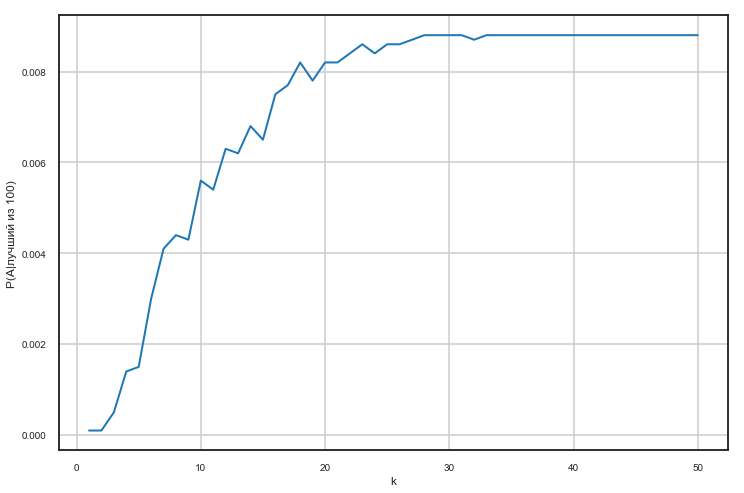

In [8]:
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['axes.titlesize']=36
plt.rcParams['axes.labelsize']=12
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['font.size'] = 15

plt.plot(K, np.array(Answers))
# plt.legend(loc='best')
plt.xlabel('k')
plt.ylabel('P(A|лучший из 100)')
plt.grid()


plt.savefig("sampler_task1.pdf")

In [9]:
ans = np.zeros(shape = [Num_people])
for T in range(Num_people):
    if (Winers[T] == Orakuls[T]).size != 0:
        ans[T] = (Winers[T] == Orakuls[T])[0]

In [10]:
print(np.sum(ans)/ans.size)

0.0088


In [22]:
k = 100
# j = np.linspace(0, k, k+1, dtype = np.int64)

p1 = 0.5
q1 = 0.5
p2 = 0.9
q2 = 0.1


def func(t):
    val, err = integrate.quad(lambda x: _p_norm(x, mu=p2*k, var=p2*q2*k), -100, t)
    return val #0.5*(sp.erf((t - p2*k)/(np.sqrt(2*p2*q2*k))) + 1)


val, err = integrate.quad(lambda x: (_p_norm(x, mu=p1*k, var=p1*q1*k)*func(x)), -10, 10*k)

In [23]:
val

3.65435566115541e-14

Задача 2

In [11]:
n = 1000
N = 100000
T = np.zeros(shape = [N])

for i in range(N):
    x = np.random.rand(n) - 0.1
    
    x = 0.5*(-np.sign(x) + 1)
             
    mean = np.mean(x)
    var = 1.0/(n-1.0) * np.sum((x - mean)**2)
    T[i] = np.sum(x)/n



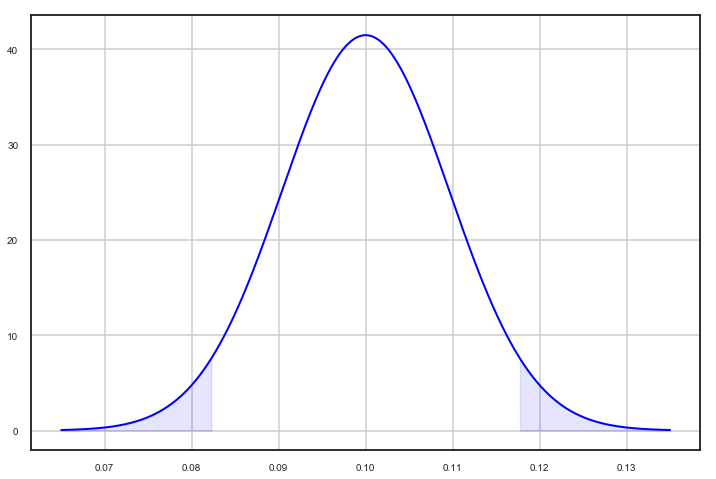

In [12]:
x = np.linspace(0.065, 0.135, 1000)
y = _p_norm(x, mu = 0.1, var = var/n)

Data_index = np.where(x>0.11774)
plt.fill_between(x[Data_index], y[Data_index], alpha = 0.1, color ='b')
Data_index = np.where(x<0.082255)
plt.fill_between(x[Data_index], y[Data_index], alpha = 0.1, color ='b')
plt.plot(x, y, label = 'rho=0.0', color ='b')

# plt.legend(loc='best')
# plt.xlabel('k')
# plt.ylabel('P(A|лучший из 100)')
plt.grid()

plt.savefig("sampler_task2_p1.pdf")

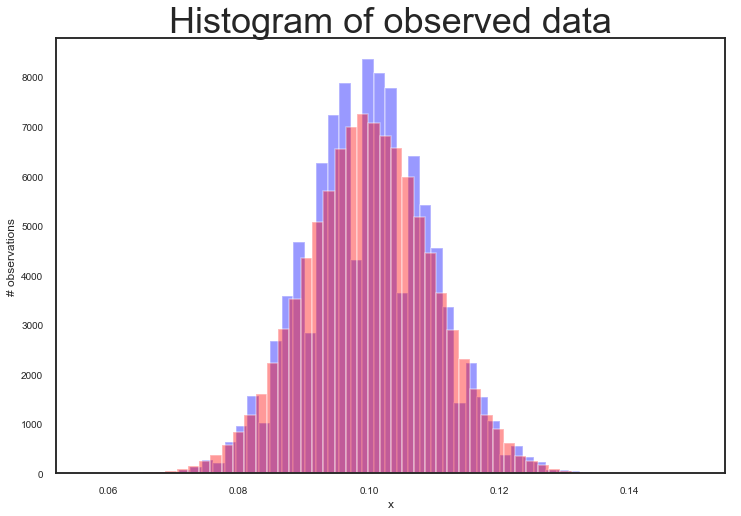

In [13]:
A = np.random.normal(loc = 0.1, scale = np.sqrt(var/n), size=N)

ax = plt.subplot() 
sns.distplot(T, kde=False, ax=ax, color = 'b')

sns.distplot(A, kde=False, ax=ax, color = 'r')

_ = ax.set(title='Histogram of observed data', xlabel='x', ylabel='# observations');

Задача 3

In [24]:
n = 100
N = 1000

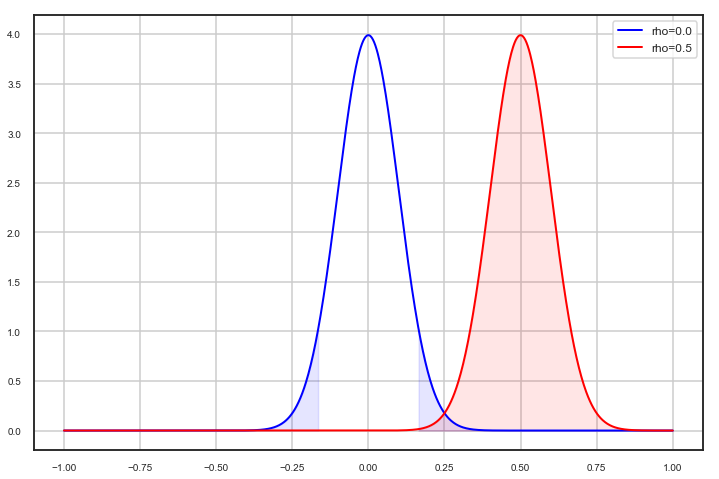

In [25]:
x = np.linspace(-1, 1, 1000)

y_ro_0 = _p_norm(x, 0.0, 1.0/n)
y_ro_05 = _p_norm(x, 0.5, 1.0/n)

Data_index = np.where(np.array(np.sign(np.array(x > 0.1645, dtype=np.int64) + np.array(x < -0.1645, dtype=np.int64)), dtype=np.bool))


# Вывести все что связано с rho = 0
Data_index = np.where(x>0.1645)
plt.fill_between(x[Data_index], y_ro_0[Data_index], alpha = 0.1, color ='b')
Data_index = np.where(x<-0.1645)
plt.fill_between(x[Data_index], y_ro_0[Data_index], alpha = 0.1, color ='b')
plt.plot(x, y_ro_0, label = 'rho=0.0', color ='b')

# Вывести все что связано с rho=0.5
Data_index = np.where(x>0.1645)
plt.fill_between(x[Data_index], y_ro_05[Data_index], alpha = 0.1, color ='r')
plt.plot(x, y_ro_05, label = 'rho=0.5', color ='r')



plt.legend(loc='best')
# plt.xlabel('k')
# plt.ylabel('P(A|лучший из 100)')
plt.grid()

plt.savefig("sampler_task3_p1.pdf")


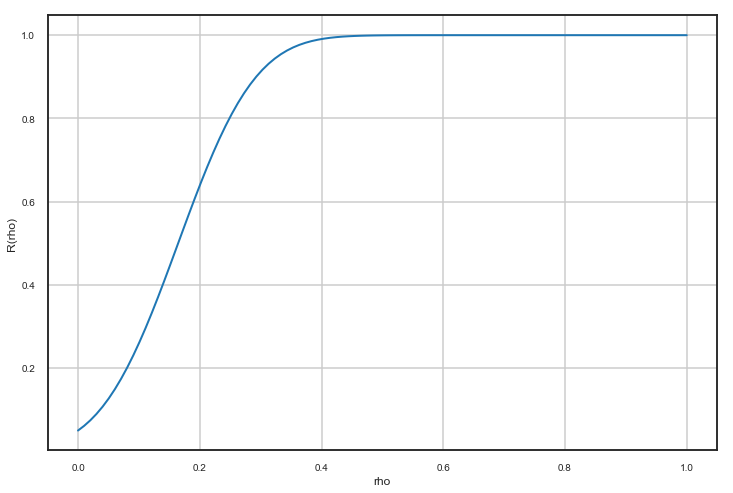

In [26]:
x = np.linspace(0.0, 1.0, 100)
y = 0.5*sp.erfc((0.1645 - x) *np.sqrt(n/2.0))

plt.plot(x, y)
# plt.legend(loc='best')
plt.xlabel('rho')
plt.ylabel('R(rho)')
plt.grid()

plt.savefig("sampler_task3_p2.pdf")

In [27]:
x = np.linspace(0.0, 1.0, 100)

mean= np.zeros(shape = [2])

n = 100
N = 2000

T = np.zeros(shape = [np.size(x), N])

for ro, i in zip(list(x), range(np.size(x))):
    cov = np.array([[1,ro],[ro,1]])
    for t in range(N):
        DataSet = np.random.multivariate_normal(mean, cov, size = n)
        T[i][t] = np.sum(np.prod(DataSet, axis = 1), axis=0)/n



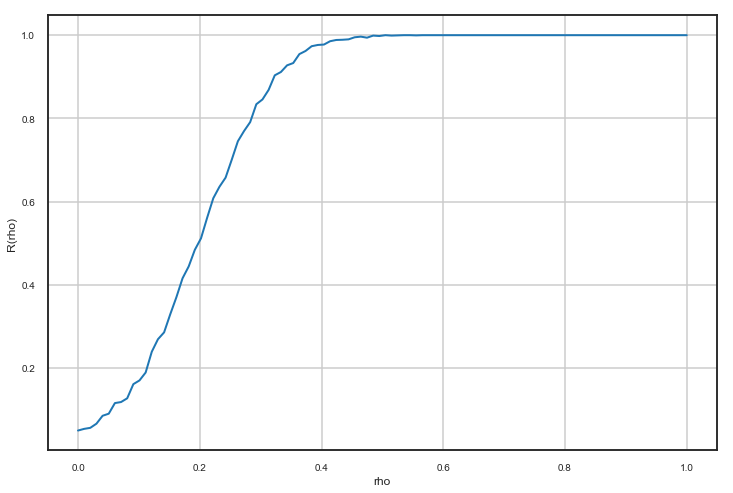

In [28]:
def _counter(T, x1, x2):
    return (len(np.where(T < x1)[0]) + len(np.where(T > x2)[0]))/np.size(T)

left_gurd = np.sort(T[0])[np.int64(0.025*N)]
right_gurd = np.sort(T[0])[np.int64((1-0.025)*N)]

y = np.zeros_like(x)

for i in range(np.size(x)):
    y[i] = _counter(T[i], left_gurd, right_gurd)
    
plt.plot(x, y)
# plt.legend(loc='best')
plt.xlabel('rho')
plt.ylabel('R(rho)')
plt.grid()

plt.savefig("sampler_task3_p3.pdf")

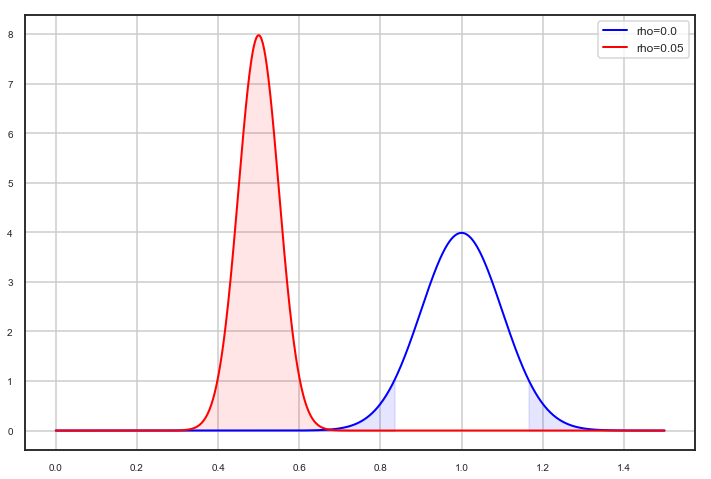

In [29]:
x = np.linspace(0, 1.5, 1000)

y_ro_0 = _p_norm(x, 1.0 - 0.0, ((1.0 - 0.0)**2)/n)
y_ro_05 = _p_norm(x, 1.0 - 0.5, ((1.0 - 0.5)**2)/n)

# Вывести все что связано с rho = 0
Data_index = np.where(x>1+0.1645)
plt.fill_between(x[Data_index], y_ro_0[Data_index], alpha = 0.1, color ='b')
Data_index = np.where(x<1-0.1645)
plt.fill_between(x[Data_index], y_ro_0[Data_index], alpha = 0.1, color ='b')
plt.plot(x, y_ro_0, label = 'rho=0.0', color ='b')

# Вывести все что связано с rho=0.5
Data_index = np.where(x<1-0.1645)
plt.fill_between(x[Data_index], y_ro_05[Data_index], alpha = 0.1, color ='r')
plt.plot(x, y_ro_05, label = 'rho=0.05', color ='r')

plt.legend(loc='best')
# plt.xlabel('k')
# plt.ylabel('P(A|лучший из 100)')
plt.grid()

plt.savefig("sampler_task3_p4.pdf")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


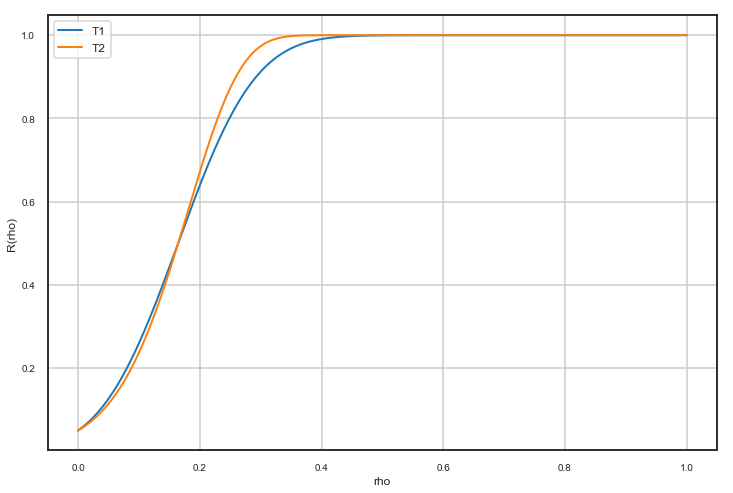

In [30]:
x = np.linspace(0.0, 1.0, 1000)

y = 0.5*sp.erfc((0.1645 - x) *np.sqrt(n/2.0))
plt.plot(x, y, label = 'T1')

y = 0.5*sp.erf((0.8355/(1-x) - 1) *np.sqrt(n/2.0))+0.5
plt.plot(x, y, label = 'T2')

plt.legend(loc='best')
plt.xlabel('rho')
plt.ylabel('R(rho)')
plt.grid()

plt.savefig("sampler_task3_p5.pdf")

Задача 4

In [32]:
n = 12

X = np.random.normal(0.0, 1.0, size = n)

N = 100000

ans = []
for i in range(N):
    Y = np.random.normal(0.0, 1.0, size = n)
    t = np.corrcoef(X, Y)[1,0]
    ans.append(t)
    
ans = np.array(ans)

In [33]:
prob2 = np.random.normal(0.0, np.sqrt(1/n), size = N)

In [34]:
def _F_n(x, X):
    k = np.zeros_like(x)
    for i in list(X):
        k[np.where(x > i)] = k[np.where(x > i)] + 1
    return k/np.size(X)

In [35]:
x = np.linspace(-1.0, 1.0, 1000)
y1 = _F_n(x, ans)
y2 = _F_n(x, prob2)

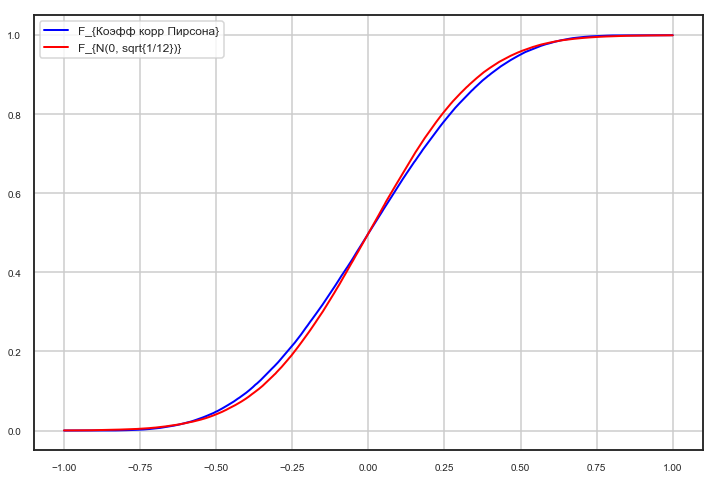

In [36]:
plt.plot(x, y1, color ='b', label = 'F_{Коэфф корр Пирсона}')
plt.plot(x, y2, color ='r', label = 'F_{N(0, sqrt{1/12})}')

plt.legend(loc='best')
# plt.xlabel('k')
# plt.ylabel('P(A|лучший из 100)')
plt.grid()
plt.savefig("sampler_task4_p1.pdf")

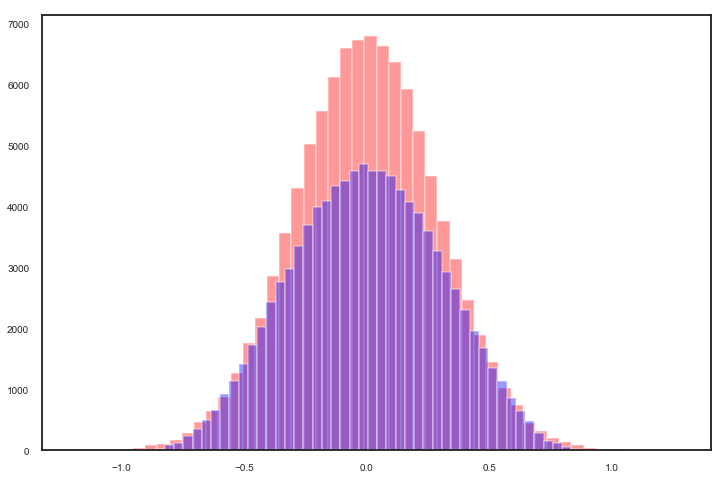

In [37]:
ax = plt.subplot() 

sns.distplot(prob2, kde=False, ax=ax, color = 'r')
sns.distplot(ans, kde=False, ax=ax, color = 'b')


# plt.legend(loc='best')

In [38]:
x = np.linspace(0.0, 0.99, 100)

In [39]:
expectetion_time = []
for t in list(x):
    val, err = integrate.quad(lambda x: _p_norm(x, mu =0, var=1.0/12.0), t, 1)
    expectetion_time.append(1.0/val)
    
expectetion_time = np.array(expectetion_time)

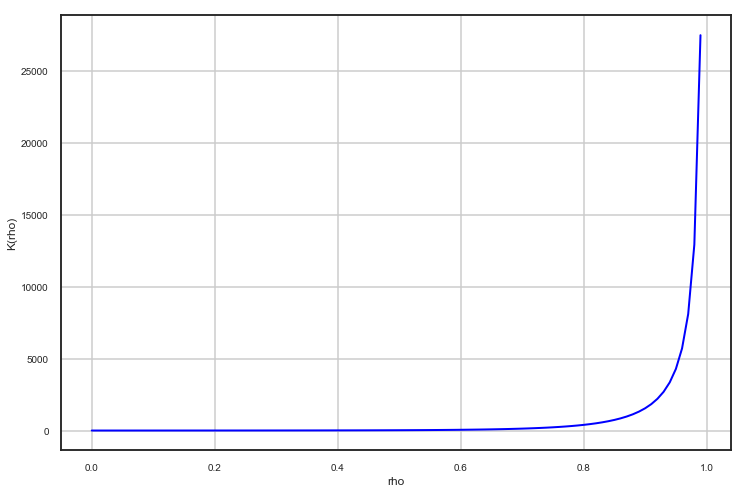

In [40]:
plt.plot(x, expectetion_time, color ='b')

# plt.legend(loc='best')
plt.xlabel('rho')
plt.ylabel('K(rho)')
plt.grid()
plt.savefig("sampler_task4_p2.pdf")

Задача 5

In [125]:
n = 10000
mean= np.array([0, 0])

alpha = 0.05

ro = 0.0
cov = np.array([[1, ro], [ro, 1]])
X = np.random.multivariate_normal(mean, cov, size = n)
v1 = np.prod(X, axis=1)

ro = 1.0
cov = np.array([[1, ro], [ro, 1]])
X = np.random.multivariate_normal(mean, cov, size = n)
v2 = np.prod(X, axis=1)

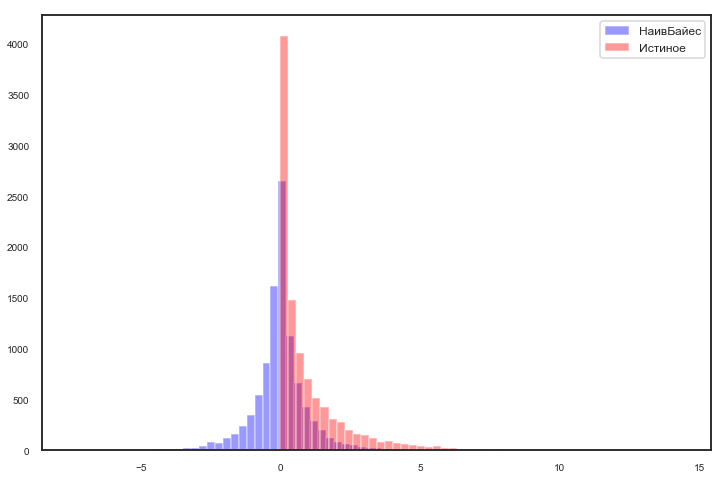

In [46]:
ax = plt.subplot() 
sns.distplot(v1, kde=False, ax=ax, color = 'b', label = 'НаивБайес')
sns.distplot(v2, kde=False, ax=ax, color = 'r', label = 'Истиное')

plt.legend(loc='best')

plt.savefig("sampler_task5.pdf")

Задача 6

In [35]:
def _p_value(a, mu = 0.0, var = 1.0):
    if a>0:
        val, _ = integrate.quad(lambda x: _p_norm(x, mu = mu, var=var), a, 10)
    if a<0:
        val, _ = integrate.quad(lambda x: _p_norm(x, mu = mu, var=var), -10, a)
    return val

In [36]:
n = 100
N = 1000

RO = np.array([0.0, 0.2])


mean= np.zeros(shape = [2])

T = np.zeros(shape = [np.size(RO), N])

for ro, i in zip(list(RO), range(np.size(RO))):
    cov = np.array([[1,ro],[ro,1]])
    for t in range(N):
        DataSet = np.random.multivariate_normal(mean, cov, size = n)
        T[i][t] = np.sum(np.prod(DataSet, axis = 1), axis=0)/n



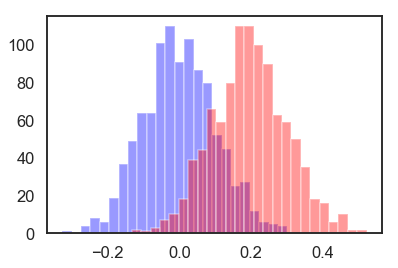

In [37]:
ax = plt.subplot() 
sns.distplot(T[0], kde=False, ax=ax, color = 'b')
sns.distplot(T[1], kde=False, ax=ax, color = 'r')


plt.savefig("sampler_task6_p1.pdf")

In [38]:
p_values = np.zeros(shape = [2, N])

for i in range(N):
    for k in range(2):
        a = T[k, i]
        p_values[k,i] = 2*_p_value(a, mu=0.0, var=1.0/n)


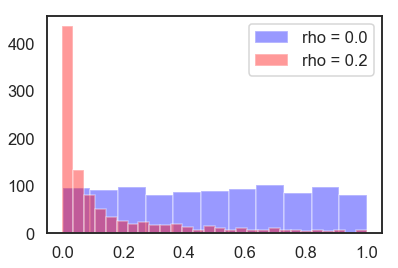

In [39]:
ax = plt.subplot() 
sns.distplot(p_values[0], kde=False, ax=ax, color = 'b', label = 'rho = 0.0')
sns.distplot(p_values[1], kde=False, ax=ax, color = 'r', label = 'rho = 0.2')

plt.legend(loc='best')

plt.savefig("sampler_task6_p2.pdf")

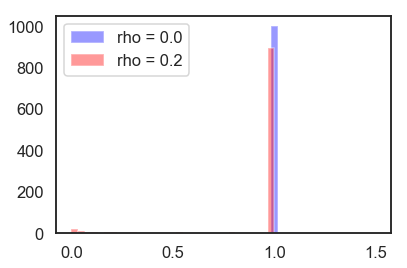

In [40]:
Bonferoni_p_values = np.array(N*p_values)
Bonferoni_p_values = Bonferoni_p_values * np.array(Bonferoni_p_values < 1, dtype=np.int64)
Bonferoni_p_values[np.where(Bonferoni_p_values == 0)] = 1
ax = plt.subplot() 
sns.distplot(Bonferoni_p_values[0], kde=False, ax=ax, color = 'b', label = 'rho = 0.0')
sns.distplot(Bonferoni_p_values[1], kde=False, ax=ax, color = 'r', label = 'rho = 0.2')

plt.legend(loc='best')

plt.savefig("sampler_task6_p3.pdf")

In [41]:
Bengamini_p_values = np.array(p_values)

Bengamini_p_values[0].sort()
Bengamini_p_values[1].sort()

Bengamini_p_values[0][N-1] = min(1, Bengamini_p_values[0][N-1])
Bengamini_p_values[1][N-1] = min(1, Bengamini_p_values[0][N-1])

for i in range(2, N):
    Bengamini_p_values[0][N-i] = min(1, N/(N-i + 1)*Bengamini_p_values[0][N-i], Bengamini_p_values[0][N-i+1])
    Bengamini_p_values[1][N-i] = min(1, N/(N-i + 1)*Bengamini_p_values[1][N-i], Bengamini_p_values[1][N-i+1])

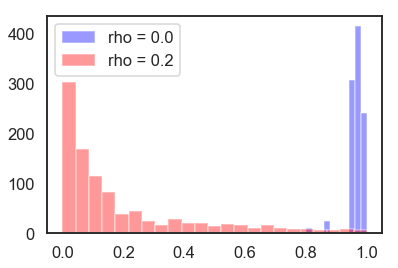

In [42]:
ax = plt.subplot() 
sns.distplot(Bengamini_p_values[0], kde=False, ax=ax, color = 'b', label = 'rho = 0.0')
sns.distplot(Bengamini_p_values[1], kde=False, ax=ax, color = 'r', label = 'rho = 0.2')

plt.legend(loc='best')

plt.savefig("sampler_task6_p4.pdf")

In [43]:
print('Ложно отклоненные')
print('Без поправки:', np.sum(p_values[0] < 0.05))
print('Бонферони:', np.sum(Bonferoni_p_values[0] < 0.05))
print('Бенджамини:', np.sum(Bengamini_p_values[0] < 0.05))

print('\n')

print('Ложно принятые')
print('Без поправки:', np.sum(p_values[1] > 0.05))
print('Бонферони:', np.sum(Bonferoni_p_values[1] > 0.05))
print('Бенджамини:', np.sum(Bengamini_p_values[1] > 0.05))

Ложно отклоненные
Без поправки: 47
Бонферони: 0
Бенджамини: 1


Ложно принятые
Без поправки: 497
Бонферони: 973
Бенджамини: 678


Задача 7

In [227]:
n = 100
N = 1000

RO = np.array([0.0, 0.2])


mean= np.zeros(shape = [2])

T = np.zeros(shape = [np.size(RO), N])

new_ro = 0.0

ROs = []

for ro, i in zip(list(RO), range(np.size(RO))):
    if ro == 0.2:
        for t in range(N):
            new_ro = np.random.choice([new_ro, 0.2 - new_ro], p = [0.3, 0.7])
            ROs.append(new_ro)
            cov = np.array([[1,new_ro],[new_ro,1]])
            DataSet = np.random.multivariate_normal(mean, cov, size = n)
            T[i][t] = np.sum(np.prod(DataSet, axis = 1), axis=0)/n
    else:
        cov = np.array([[1,ro],[ro,1]])
        for t in range(N):
            DataSet = np.random.multivariate_normal(mean, cov, size = n)
            T[i][t] = np.sum(np.prod(DataSet, axis = 1), axis=0)/n

ROs = np.array(ROs)

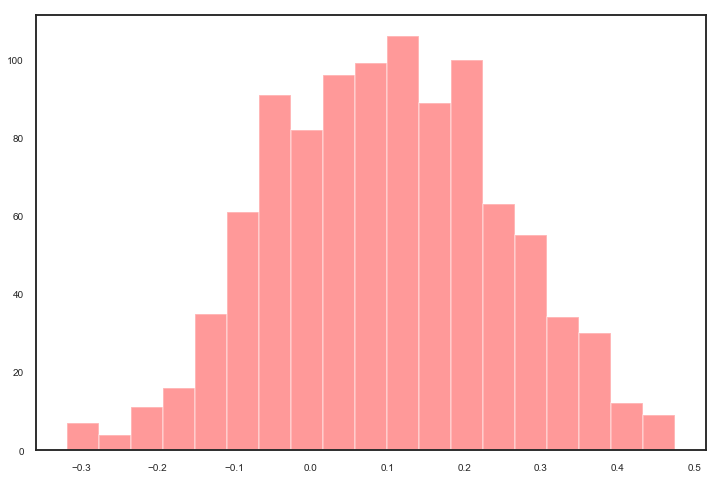

In [236]:
ax = plt.subplot() 
# sns.distplot(T[0], kde=False, ax=ax, color = 'b')
sns.distplot(T[1], kde=False, ax=ax, color = 'r')


plt.savefig("sampler_task7_p1.pdf")

In [237]:
p_values = np.zeros(shape = [2, N])

for i in range(N):
    for k in range(2):
        a = T[k, i]
        p_values[k,i] = _p_value(a, mu=0.0, var=1.0/n)


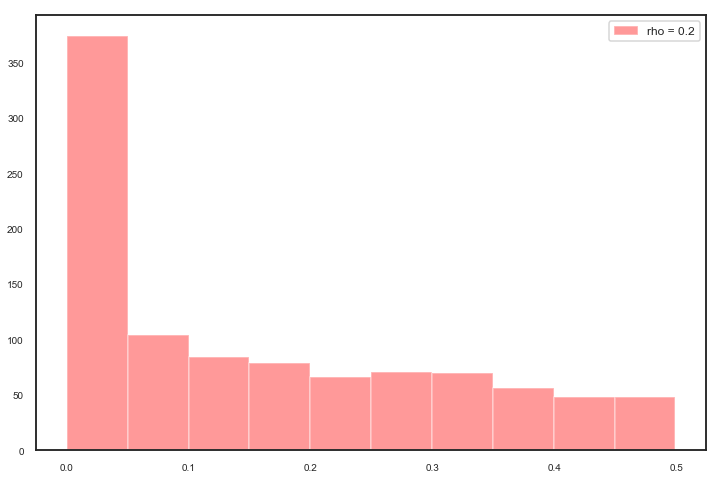

In [238]:
ax = plt.subplot() 
# sns.distplot(p_values[0], kde=False, ax=ax, color = 'b', label = 'rho = 0.0')
sns.distplot(p_values[1], kde=False, ax=ax, color = 'r', label = 'rho = 0.2')

plt.legend(loc='best')

plt.savefig("sampler_task7_p2.pdf")

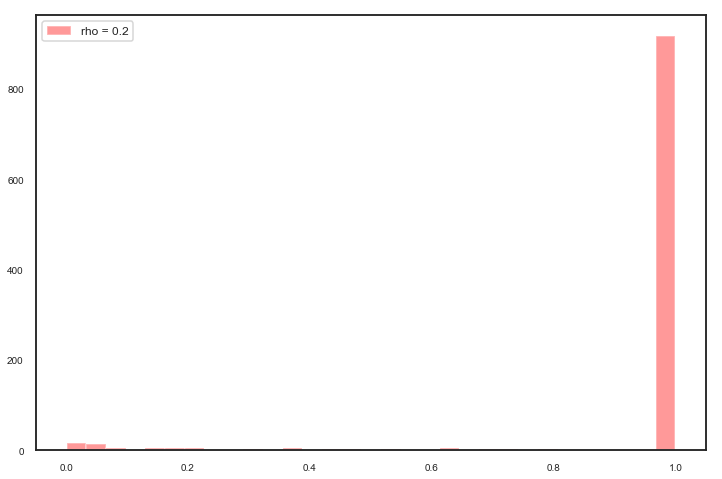

In [239]:
Bonferoni_p_values = np.array(N*p_values)
Bonferoni_p_values = Bonferoni_p_values * np.array(Bonferoni_p_values < 1, dtype=np.int64)
Bonferoni_p_values[np.where(Bonferoni_p_values == 0)] = 1
ax = plt.subplot() 
# sns.distplot(Bonferoni_p_values[0], kde=False, ax=ax, color = 'b', label = 'rho = 0.0')
sns.distplot(Bonferoni_p_values[1], kde=False, ax=ax, color = 'r', label = 'rho = 0.2')

plt.legend(loc='best')

plt.savefig("sampler_task7_p3.pdf")

In [240]:
Bengamini_p_values = np.array(p_values)

Bengamini_p_values[0].sort()
Bengamini_p_values[1].sort()

Bengamini_p_values[0][N-1] = min(1, Bengamini_p_values[0][N-1])
Bengamini_p_values[1][N-1] = min(1, Bengamini_p_values[0][N-1])

for i in range(2, N):
    Bengamini_p_values[0][N-i] = min(1, N/(N-i + 1)*Bengamini_p_values[0][N-i], Bengamini_p_values[0][N-i+1])
    Bengamini_p_values[1][N-i] = min(1, N/(N-i + 1)*Bengamini_p_values[1][N-i], Bengamini_p_values[1][N-i+1])

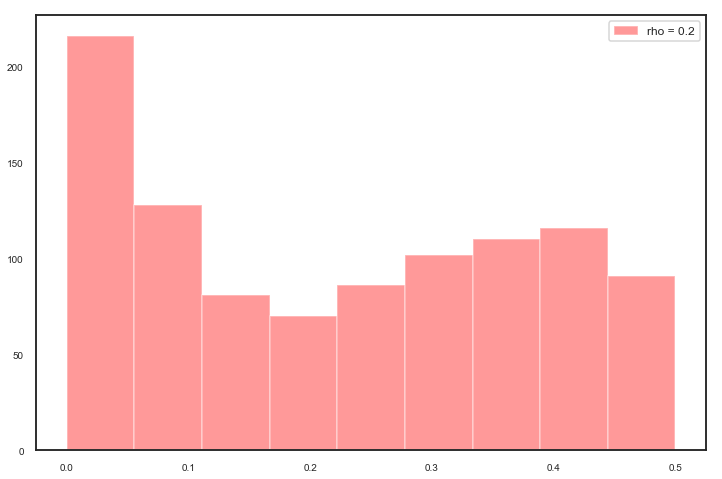

In [241]:
ax = plt.subplot() 
# sns.distplot(Bengamini_p_values[0], kde=False, ax=ax, color = 'b', label = 'rho = 0.0')
sns.distplot(Bengamini_p_values[1], kde=False, ax=ax, color = 'r', label = 'rho = 0.2')

plt.legend(loc='best')

plt.savefig("sampler_task7_p4.pdf")

In [244]:
print('Ложно отклоненные')
print('Без поправки:', np.sum(p_values[1][np.where(ROs == 0.0)] < 0.05))
print('Бонферони:', np.sum(Bonferoni_p_values[0][np.where(ROs == 0.0)] < 0.05))
print('Бенджамини:', np.sum(Bengamini_p_values[0][np.where(ROs == 0.0)] < 0.05))

print('\n')

print('Ложно принятые')
print('Без поправки:', np.sum(p_values[1][np.where(ROs == 0.2)] > 0.05))
print('Бонферони:', np.sum(Bonferoni_p_values[1][np.where(ROs == 0.2)] > 0.05))
print('Бенджамини:', np.sum(Bengamini_p_values[1][np.where(ROs == 0.2)] > 0.05))

Ложно отклоненные
Без поправки: 64
Бонферони: 0
Бенджамини: 1


Ложно принятые
Без поправки: 193
Бонферони: 478
Бенджамини: 403
